   # TP de Méthodes Numériques : 
   # Simulation d'une chaîne d'oscillateurs non linéaires

On considère un système de $n$ oscillateurs couplés, régi par une
équation différentielle du second ordre dans $\mathbb{R}^n$ :
\begin{equation}
\frac{d^2u}{dt^2}+C\, \frac{du}{dt}=f(u) \quad (1)
\end{equation}
avec $u(t)= (u_1(t), u_2(t), \ldots , u_n(t))^T \in \mathbb{R}^n$, 
$f\, : \mathbb{R}^n \rightarrow \mathbb{R}^n$ fonction de classe $C^2$ et
$$
C\in M_n(\mathbb{R}) \ \ 
\mbox{symétrique définie positive.}
$$
Nous allons simuler numériquement des équations de la forme (1) à l'aide du schéma
aux différences finies centré implicite
\begin{equation}
\frac{u^{(k+1)}-2u^{(k)}+u^{(k-1)}}{h^2}+C\, \frac{u^{(k+1)}-u^{(k-1)}}{2\, h}=f(u^{(k)})
\quad (2)
\end{equation}
où $h>0$ est le pas de discrétisation et $u^{(k)}$ une approximation de $u(k\, h)$.

En introduisant la variable auxiliaire 
$$
v=\frac{du}{dt}+C\, u,
$$
l'équation différentielle du second ordre (1) est équivalente à celle du premier ordre dans $\mathbb{R}^n \times \mathbb{R}^n$
\begin{equation}
\left\{
\begin{array}{lll}
u'&=& v-C\, u, \\
v' &=& f(u),
\end{array}
\right.
\quad (3)
\end{equation}
pour laquelle nous donnerons une reformulation du schéma (2).

Les schémas numériques mis en oeuvre nous permettront 
d'étudier la convergence de différents systèmes vers un état d'équilibre
et certains phénomènes transitoires. 
Une solution d'équilibre $u^\ast \in \mathbb{R}^n$ de (1) est une solution indépendante de $t$,
caractérisée par la propriété $f(u^\ast)=0$. De manière équivalente, une 
solution d'équilibre $(u^\ast , v^\ast) \in \mathbb{R}^n \times \mathbb{R}^n$ de (3)
est caractérisée par
$$
f(u^\ast)=0, \quad v^\ast = C\, u^\ast.
$$

## 1. Reformulation et étude du schéma centré

Etant donné une condition initiale 
$$
(u(0),v(0)) = 
(u^{(0)},v^{(0)}),
$$
on souhaite calculer numériquement $(u(t),v(t))$ pour $t \in [0,T]$.
On approche $(u(kh),v(kh))$ par la solution $(u^{(k)},v^{(k)})$ du schéma suivant
\begin{equation}
\forall k\geq 0, \quad 
\left\{
\begin{array}{lllr}
v^{(k+1/2)}&=&v^{(k)}+\frac{h}{2}\, f(u^{(k)}) & (a) \\
u^{(k+1)}&=&u^{(k)}+h\, v^{(k+1/2)} -h\, C\,  \frac{u^{(k+1)}+u^{(k)}}{2} & (b)\\
v^{(k+1)}&=&v^{(k+1/2)}+\frac{h}{2}\, f(u^{(k+1)}). & (c)
\end{array}
\right.
\quad (4)
\end{equation}
A chaque itération, il est nécessaire de résoudre l'équation (4)-(b) pour $u^{(k+1)}$, qui correspond au système linéaire
$$
A\, u^{(k+1)} = \big(I-\frac{h}{2}\, C\big)\, u^{(k)}+h\, v^{(k+1/2)}
$$
de matrice symétrique définie positive
$$
A=I+\frac{h}{2}\, C. \quad (5)
$$

#### Question 1 
Montrer que la condition initiale et la
relation de récurrence (4) déterminent la suite $(u^{(k)},v^{(k)})_{k \geq 0}$.

#### Reponse :<br>

##### On va montrer par recurrence que la condition initiale $(u^{(0)},v^{(0)})$,et la rélation (4) détérmine $\forall~k \geq0~(u^{(k)},v^{(k)})$<br>


on a d'aprés la rélation $(4)$<br>
$\begin{equation}
pour k=1, \quad 
\left\{
\begin{array}{lllr}
v^{(1/2)}&=&v^{(0)}+\frac{h}{2}\, f(u^{(0)})  \\
u^{(1)}&=&u^{(0)}+h\, v^{(1/2)} -h\, C\,  \frac{u^{(1)}+u^{(0)}}{2} \\
v^{(1)}&=&v^{(1/2)}+\frac{h}{2}\, f(u^{(1)}). 
\end{array}
\right.
\quad (4)
\end{equation}$
            
donc<br>

$$Au^{(1)}=(I-\frac{h}{2}C)u^{(0)}+hv^{(0)}+\frac{h²}{2}f(u^{(0)}))$$<br>
posons: <br>
$$b=(I-\frac{h}{2}C)u^{(0)}+hv^{(0)}+\frac{h²}{2}f(u^{(0)}))$$<br>
$b$ est connue,car $(u^{(0)},v^{(0)})$ est connue<br>

or $A$ est inversible (car symétrique définie positive), alors<br>
$$u^{(1)}~est~la~solution~de~Ax=b$$<br>
donc on peut trouver $u^{(1)}$<br>
Or $$v^{(1)} =v^{(\frac{1}{2})}+\frac{h}{2}f(u^{(1)})=v^{(1/2)}+\frac{h}{2}f(A^{-1}b)$$<br>
* Soit $k\geq1$ suposons qu'on a calculé $(u^{(k)},v^{(k)})$, On cherche à calculer $(u^{(k+1)},v^{(k+1)})$<br>

Par la même procedure, que précédament on a <br>
$$\begin{equation}
\quad 
\left\{
\begin{array}{lllr}
u^{(k+1)} ~est~la ~solution~ de~ Ax=b~ avec~ b=(I-\frac{h}{2}C)u^{(k)}+hv^{(k)}+\frac{h²}{2}f(u^{(k)})) \\
et \\
v^{(k+1)}=v^{(k+1/2)}+\frac{h}{2}f(A^{-1}b)
\end{array}
\right.
\quad 
\end{equation}$$









On notera $\varphi\, : \big(\mathbb{R}^n \big)^2 \rightarrow \big(\mathbb{R}^n \big)^2$ 
l'application définie par (4)
$$(u^{(k)},v^{(k)}) \mapsto \varphi (u^{(k)},v^{(k)})= (u^{(k+1)},v^{(k+1)}).$$

#### Question 2 
Montrer que toute solution de (4) vérifie (2) pour tout $k\geq 1$.

Réponse : 
ona
$$\frac{u^{(k+1)}-2u^{(k)}+u^{(k-1)}}{h^2}+C\, \frac{u^{(k+1)}-u^{(k-1)}}{2\, h}$$

$$=\frac{u^{(k+1)}-2u^{(k)}}{h^2}+\frac{C}{2h}u^{(k+1)} +(\frac{1}{h^{2}}I-\frac{C}{2h})u^{(k-1)}$$

$$=\frac{u^{(k+1)}-2u^{(k)}}{h^2}+\frac{C}{2h}u^{(k+1)} +(\frac{1}{h^{2}}I+\frac{C}{2h})u^{(k)}-\frac{1}{h}v^{(k-1/2)}~~~~~(4).b$$  

$$=(\frac{1}{h^{2}}I+\frac{C}{2h})u^{(k+1)} + (-\frac{1}{h^{2}}I+\frac{C}{2h})u^{(k)}- \frac{1}{h}(v^{(k)}-\frac{h}{2}f(u^{(k)})~~~~(4).c$$

$$= (\frac{1}{h^{2}}I+\frac{C}{2h})u^{(k+1)} + (-\frac{1}{h^{2}}I+\frac{C}{2h})u^{(k)}-\frac{1}{h}v^{(k)}+\frac{h}{2}f(u^{(k)})$$

$$=(\frac{1}{h^{2}}I+\frac{C}{2h})u^{(k+1)} + (-\frac{1}{h^{2}}I+\frac{C}{2h})u^{(k)}-\frac{1}{h}(v^{(k+1/2)}-\frac{h}{2}f(u^{k}))+\frac{1}{2}f(u^{(k)})~~~(4).a$$

$$=(\frac{1}{h^{2}}I+\frac{C}{2h})u^{(k+1)} + (-\frac{1}{h^{2}}I+\frac{C}{2h})u^{(k)}$$
$$-\frac{1}{h^{2}}(u^{(k+1)}-u^{(k)}+\frac{hC}{2}u^{(k+1)}+\frac{hC}{2}u^{(k)})+f(u^{(k)})~~~(4).b$$

$$=(\frac{1}{h^{2}}I+\frac{C}{2h}-\frac{1}{h^{2}}-\frac{C}{2h})u^{(k+1)}$$
$$+(-\frac{1}{h^{2}}I+\frac{C}{2h}+\frac{1}{h^{2}}I-\frac{C}{2h})u^{(k)}+f(u^{(k)})$$

$$=f(u^{(k)})$$

Alors toutes solutions de (4) est solution de (2)

#### Question 3
Vérifier que les points fixes de $\varphi$ sont les équilibres $(u^\ast , v^\ast)$ de (3).

Réponse : <br>

soit $(u,v)$ un point fixe de $\varphi$ alors<br>
$$\varphi (u,v)= (u,v).$$
Donc <br>
$$\begin{equation}
\quad 
\left\{
\begin{array}{lllr}
Au=(I-\frac{h}{2}C)u+hv+\frac{h²}{2}f(u)) \\
v=v+\frac{h}{2}f(u)+\frac{h}{2}f(u)
\end{array}
\right.
\quad 
\end{equation}$$
donc<br>
$$\begin{equation}
\quad 
\left\{
\begin{array}{lllr}
f(u)=0 \\
hCu=hv 
\end{array}
\right.
\quad 
\end{equation}$$
or $h>0$, alors:<br>
$$\begin{equation}
\quad 
\left\{
\begin{array}{lllr}
f(u)=0 \\
v=Cu 
\end{array}
\right.
\quad 
\end{equation}$$

Donc les points fixes de $\varphi$ sont les solutions de l'équation (3)





#### Question 4
Déterminer l'ordre de consistance du schéma (4).

Réponse : 
on a d'aprés (5) et (4).a :

$$ u^{(k+1)}-u^{(k)} = A^{-1}[(I-\frac{h}{2}C)u^{(k)} +hv^{(k)}+\frac{h^{2}}{2}f(u^{(k)})-Au^{(k)}]$$

$$=hA^{-1}[v^{(k)}-Cu^{(k)}+\frac{h}{2}f(u^{(k)})]$$

d'ou on pose d'aprés (3):
$$\phi(t,u(t),h)=A^{-1}(u'(t)+\frac{h}{2}v'(t))$$
donc d'aprés le developpement de taylor à l'ordre 2 on :

$$\parallel  \frac{u(t+h)-u(t)}{h} - \phi(t,u(t),h) \parallel $$
$$= \parallel  u'(t) + \frac{h}{2}u"(t) + O(h^{2}) - A^{-1}(u'(t)+\frac{h}{2}v'(t))\parallel$$
$$=O(h^{2})$$

donc l'ordre de consistance du schéma (4) est 2.

#### Question 5
On admet que lorsque $f$ est lipschitzienne sur $\mathbb{R}^n$,
le schéma (4) est stable par rapport aux erreurs sur l'intervalle $[0,T]$.
Justifier dans ce cas la convergence du schéma (4) lorsque $h\rightarrow 0$ et donner son ordre de convergence.

##### Réponse : <br>
On vient de montrer que f est consitante, et elle est stable ( car f est supposée lipschitzienne ),<br>
alors d'aprés le théoréme du cour le schéma (4) est convergent,
de plus l'ordre de convergence est celui de consistance,<br>
donc l'ordre de convergence est 2

## 2. Test du schéma pour un oscillateur linéaire

On considère l'équation (1) pour $u(t) \in \mathbb{R}$, $C>0$ et 
$$f(u)=1-u.$$
Ce système décrit par exemple le déplacement d'un ressort linéaire amorti soumis à une force constante unitaire.
Les solutions $u(t)$ de (1) peuvent être calculées explicitement dans ce cas (l'équation est linéaire non homogène à coefficients constants). Ce calcul permet de tester le schéma (4) avant de l'appliquer aux exemples plus complexes étudiés dans les sections 3 et 4.

#### Question 6
Calculer la solution d'équilibre $(u^\ast , v^\ast)$ de (3).

Réponse : <br>
on a:<br>
$$\begin{equation}
\quad 
\left\{
\begin{array}{lllr}
f(u*)=0 \\
v*=Cu* 
\end{array}
\right.
\quad 
\end{equation}$$

donc <br>
$$\begin{equation}
\quad 
\left\{
\begin{array}{lllr}
u*=1 \\
v*=c 
\end{array}
\right.
\quad 
\end{equation}$$

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

#### Question 7
Ecrire une fonction **iter** qui calcule la solution $[u^{(k+1)},v^{(k+1)}]$ de (4)
en fonction des arguments $[u^{(k)}$, $v^{(k)}]$ et $h$.
Pour des valeurs de votre choix de $C$ et $h$,
tester cette fonction sur le vecteur $[u^{(k)}$, $v^{(k)}]=[u^{\ast}$, $v^{\ast}]$.

In [6]:
#valeur de c pour le test 
c=0.3

# On implementé f(u) tout d'abord 
def f(u):
    return 1-u

# on implemente iter(uk,vk,h)
def iter(uk,vk,h):
    
    # on calcul v(k+1/2)
    a=f(uk)
    inter=vk+(h/2)*a # inter c'est v(k+1/2)
    
    #on calcul u(k+1)
    A=1+(h/2)*c
    uk_plus_1=(1/A)*((1-(h/2)*c)*uk +h*inter)
    
    # on calcul v(k+1)
    b=f(uk_plus_1)
    vk_plus_1=inter+(h/2)*b
    
    # on return u(k+1),v(k+1)
    return [uk_plus_1,vk_plus_1]

# On test la fonction iter sur(u*,v*)
u=1 # u represente u*
v=c # v represente v*
h=0.1
print(f'la valeur de iter en (u*,v*) est, {iter(u,v,h)}' )


la valeur de iter en (u*,v*) est, [1.0, 0.3]


#### Question 8
Ecrire une fonction **solnum** (prenant en arguments
la condition initiale $[u(0),v(0)]$, le temps maximal d'intégration $T$ et le pas $h$)
qui calcule la solution numérique $[u^{(k)},v^{(k)}]$
aux temps $t_k = k\, h \in [0,T]$, c'est à dire jusqu'à l'itéré 
$k_{\mathrm{max}}=\mathrm{E}(T/h)$ où $\mathrm{E}$ désigne la partie entière.
La fonction fournit en sortie
les valeurs de $[u^{(k)},v^{(k)}]$ pour $0 \leq k \leq k_{\mathrm{max}}$
sous la forme d'une matrice de taille $2 \times (k_{\mathrm{max}}+1)$.
Pour des valeurs de votre choix de $C$, $T$ et $h$,
tester cette fonction sur la condition initiale $[u(0), v(0)]=[u^{\ast}, v^{\ast}]$.

In [7]:
def solnum(u0,v0,T,h):
    kmax=int(T/h)
    matrice=np.zeros((2,kmax+1))
    matrice[0][0]=u0
    matrice[1][0]=v0
    for i in range(1,kmax+1):
        valeur=iter(u0,v0,h)
        matrice[0][i]=valeur[0]
        matrice[1][i]=valeur[1]
        u0,v0=valeur[0],valeur[1]
    return matrice
# test de solnum
u=1
c=0.3
v=c
T=1
h=10**(-1)
matrice=solnum(u,v,T,h)
print(f'l\'approximation de u,v aux pointx tk=kh avec les conditions initiales (u*,v*) est {matrice}  ' )


l'approximation de u,v aux pointx tk=kh avec les conditions initiales (u*,v*) est [[1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. ]
 [0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3]]  


Dans les questions 9 à 11, on fixe $C=0.3$ et
on suppose le système initialement au repos :
$$
u(0)=0, \quad u^\prime (0)=0, \quad (6)
$$
et donc $v(0)=0$.

#### Question 9
Calculer la solution explicite $(u(t),v(t))$ de (3) pour cette condition initiale.
Que vaut $\lim_{t\rightarrow +\infty}(u(t),v(t))$ ?
Ecrire une fonction **solexacte** prenant en argument un vecteur de temps $[t_k ]_{0\leq k \leq k_{\mathrm{max}}}$,
qui évalue cette solution aux temps $t_k$ en stockant les valeurs dans
une matrice de taille $2 \times (k_{\mathrm{max}}+1)$. 

Réponse (calcul explicite) :


EN utilisant 

\begin{equation}
\left\{
\begin{array}{lll}
u'&=& v-C\, u, \\
v' &=& f(u),
\end{array}
\right.
\quad (3)
\end{equation}

en dérivant la prémiére et en remplaçant v' par la seconde on obtient l'équation differentielle en u suivante:

\begin{equation}
\left\{
\begin{array}{lll}
u'' + Cu' +u &=& 1 
\end{array}
\right.
\quad (3)
\end{equation}

une solution particuliére est :

\begin{equation}
\left\{
\begin{array}{lll}
up &=& 1 
\end{array}
\right.
\quad (3)
\end{equation}

resolvons alors l'équation homogéne avec l'équation caractéristique :

\begin{equation}
\left\{
\begin{array}{lll}
u'' + Cu' +u &=& 0 \\
r^{2} + Cr+1 &=&0
\end{array}
\right.
\quad 
\end{equation}

l'éequation caractéristique admet deux solutions complexes (non réelles) :

les solutions de l'équation caractéristiques sont :

\begin{equation}
\left\{
\begin{array}{lll}
r1 &=& \frac{-C-i\sqrt{4-C^{2}}}{2}  \\
r2 &=& \frac{-C+i\sqrt{4-C^{2}}}{2}
\end{array}
\right.
\quad 
\end{equation}

Alors la solution de équation homogéne est de la forme :
$$ uh= \exp(\frac{-ct}{2})\times(A\cos(\frac{\sqrt{4-c^{2}}}{2}\times t)+B\sin(\frac{\sqrt{4-c^{2}}}{2}\times t)) $$

une solution particuliére est:
$$up=1$$

En utilisant les conditions initiales :

\begin{equation}
\left\{
\begin{array}{lll}
u(0) &=& 0 \\
u'(0) &=&0 \\
v(0)=0
\end{array}
\right.
\quad 
\end{equation}

on a d'aprés la prémiére ($u(0)=0$):
$$A=-1$$
et d'aprés la seconde ($u'(0)=0$):
$$B = \frac{-c}{\sqrt{4-c^{2}}}$$

Alors la solution finale est:
$$ \color{green} {u(t) = \exp(\frac{-ct}{2})\times(-\cos(\frac{\sqrt{4-c^{2}}}{2}\times t) - \frac{c}{\sqrt{4-c^{2}}} \times \sin(\frac{\sqrt{4-c^{2}}}{2}\times t)) + 1} $$

Et pour $v$ on a:
$$ v(t) = u'(t) + cu(t) $$
or:$$ u'(t) = -\frac{c}{2}\exp(\frac{-ct}{2})\times(-\cos(\frac{\sqrt{4-c^{2}}}{2}\times t) - \frac{c}{\sqrt{4-c^{2}}} \times \sin(\frac{\sqrt{4-c^{2}}}{2}\times t)) $$
$$+ \exp(-\frac{ct}{2})(\frac{\sqrt{4-c^{2}}}{2}\times\cos(\frac{\sqrt{4-c^{2}}}{2}\times t) - \frac{c}{\sqrt{4-c^{2}}}\times \frac{\sqrt{4-c^{2}}}{2}\times \cos(\frac{\sqrt{4-c^{2}}}{2}\times t)) $$
$$ = \exp(-\frac{ct}{2})\times( \frac{2}{\sqrt{4-c^{2}}}\times\sin(\frac{\sqrt{4-c^{2}}}{2}\times t))$$

D'ou en sommant puis factorisant par $exp$ puis par $cos$ et $sin$  on trouve :
$$\color{green} {v(t) = \exp(-\frac{ct}{2})\times( \frac{2-c^{2}}{\sqrt{4-c^{2}}}\times\sin(\frac{\sqrt{4-c^{2}}}{2}\times t) - c\cos(\frac{\sqrt{4-c^{2}}}{2}\times t)) + c} $$

D'aprés les expressions de u et v et comme $cos~et~sin~=~O(exp(-\frac{ct}{2})$ on a:
$$\lim_{t\rightarrow +\infty}(u(t),v(t)) = (1,c)$$





In [8]:
c=0.3
r=-c/2
s=(np.sqrt(4-c**2))/2
b=-c/(np.sqrt(4-c**2))


def u(t):
    
    return (np.exp(r*t))*(-(np.cos(s*t))+(np.sin(s*t))*b)+1

def v(t):
    d=(2-c**2)/(np.sqrt(4-c**2))
     
    
    return (np.exp(r*t))*(d*(np.sin(s*t))-c*(np.cos(s*t))) +c  
    

def solexacte(t):
    
    kmax=len(t)-1
    matrice=np.zeros((2,kmax+1)) 
    
    for i in range(0,kmax+1):
        a=u(t[i])
        b=v(t[i])
        matrice[0][i]=a
        matrice[1][i]=b
        
    return matrice


# test de solexact 

# on test u(t) et v(t)
print(u(0))
print(v(0))

# on test solexact 
T=1
h=10**(-1)
t=[k*h for k in range(0,int(T/h)+1)]
print(f'les valeures de t sont :  {t}')
print(f'les valeures de u et v  en t exactes sont : {solexacte(t)}')
print(f'les valeures numeriique de u et v  en t sont : {solnum(0,0,T,h)}')

0.0
0.0
les valeures de t sont :  [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0]
les valeures de u et v  en t exactes sont : [[0.         0.00494626 0.01954092 0.04335519 0.07588216 0.11654417
  0.16470054 0.21965576 0.28066796 0.34695756 0.41771609]
 [0.         0.09983466 0.19868904 0.29561907 0.3897275  0.4801714
  0.56616879 0.64700461 0.7220357  0.79069507 0.8524952 ]]
les valeures numeriique de u et v  en t sont : [[0.         0.00492611 0.0195103  0.04332343 0.07585811 0.11653602
  0.1647157  0.21970076 0.28074832 0.34707774 0.41787942]
 [0.         0.09975369 0.19853187 0.29539019 0.38943111 0.4798114
  0.56574882 0.64652799 0.72150554 0.79011424 0.85186638]]


#### Question 10
On fixe $T=25$. Tracer le graphe de l'erreur globale
$$\mathrm{Err}\,(h)=\mathrm{max}_{0\leq k \leq k_{\mathrm{max}}}\| (u^{(k)},v^{(k)})-(u(t_k),v(t_k)) \|_2$$
pour $h \in [10^{-5}, 10^{-1}]$ en utilisant une échelle logarithmique.
Retrouvez-vous l'ordre de convergence obtenu dans la question 5 ?

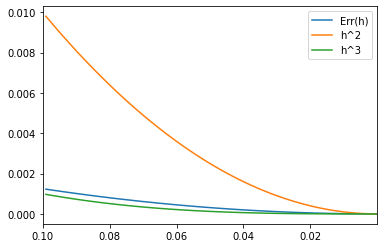

D'apres l'affichage on que l'ordre de consistance est 2 


In [11]:
T=25
u0=0
v0=0
def Err(h):
    
    kmax=int(T/h)
    mat_num=solnum(u0,v0,T,h)
    mat_exacte=solexacte([k*h for k in range(0,kmax+1)])
    err=[]
    
    for k in range(0, kmax+1):
        valeur=(mat_num[0][k]-mat_exacte[0][k])**2 + (mat_num[1][k]-mat_exacte[1][k])**2
        err.append(np.sqrt(valeur))
    return max(err)

# Tracage de la fonction Err(h) en fonction de h
pas=(10**(-1)-10**(-5))/101
val_h=[10**(-5)+k*pas for k in range(0,101)]
val_err=[Err(h) for h in val_h]
plt.plot(val_h,val_err,label="Err(h)")
val_h_2 =[h**2 for h in val_h]
plt.plot(val_h,val_h_2,label="h^2")
val_h_3 =[h**3 for h in val_h]
plt.plot(val_h,val_h_3,label="h^3")
plt.xlim(10**(-1),10**(-5))
plt.legend()
plt.show()


print("D'apres l'affichage on que l'ordre de consistance est 2 ")

    

#### Question 11
Etudier numériquement pour quelles valeurs de $h >0$ on a 
$\lim_{k\rightarrow +\infty}{(u^{(k)},v^{(k)})}=\lim_{t\rightarrow +\infty}(u(t),v(t))$.
Pour cela, on pourra afficher pour différentes valeurs de $h$, et sur des intervalles de temps $[0,T]$ bien choisis,
les graphes de $u^{(k)}$ et $v^{(k)}$ en fonction de $t_k$.

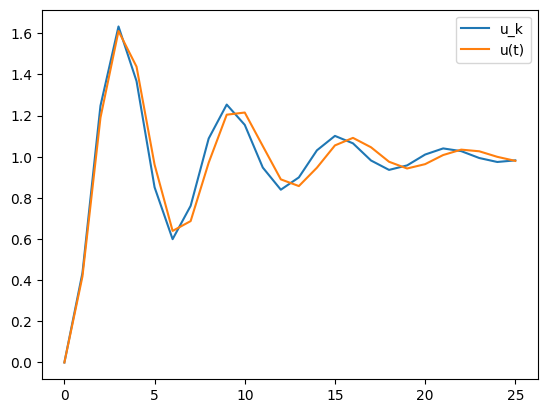

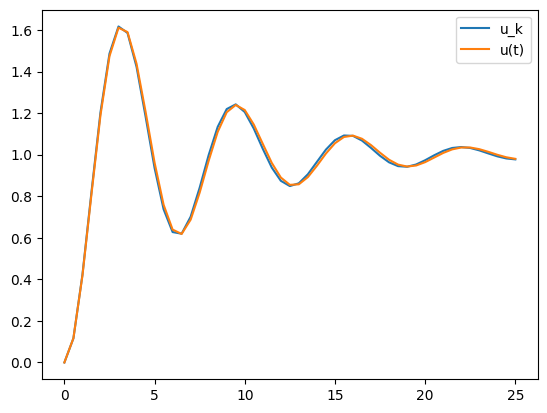

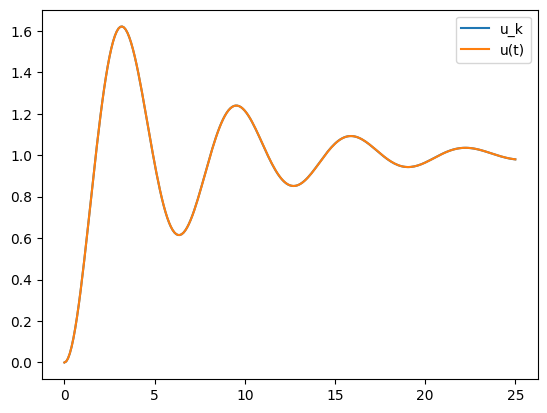

Donc pour T=25 on' a  la convergance de u_k vers u(t) a partir de h=10^{-1}


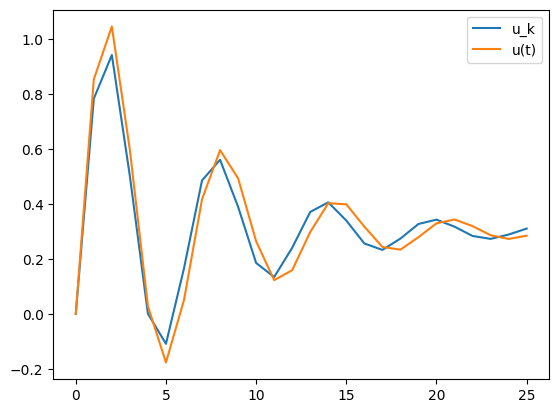

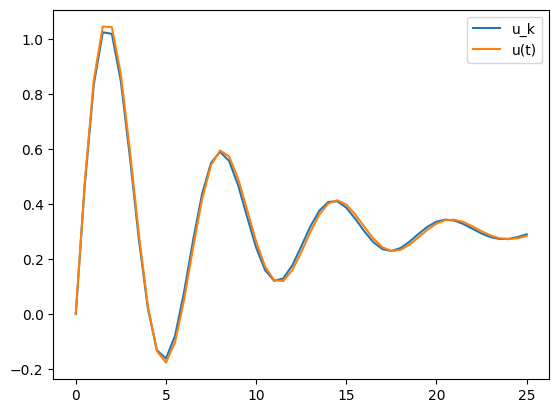

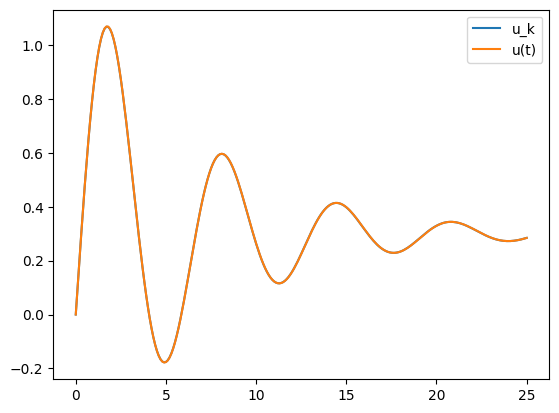

Donc pour T=25 on' a  la convergance de v_k vers v(t) a partir de h=10^{-1}


In [12]:
def tracage_u_k(T,h):
    
    
    t=[k*h for k in range(0,int(T/h)+1)]
    mat_num =solnum(0,0,T,h)
    mat_excate =solexacte(t)
    

    val_u_k = mat_num[0]
    val_u_t= mat_excate[0]
    plt.plot(t,val_u_k,label="u_k")
    plt.plot(t,val_u_t,label="u(t)")
    
    plt.legend()
    plt.show()

# pour h=10**(-1) et T=25
T=25
h=1
tracage_u_k(T,h)
    

# pour h=10**(-2) et T=25
T=25
h=0.5
tracage_u_k(T,h)

# pour h=10**(-3) et T=25
T=25
h=10**(-1)
tracage_u_k(T,h)


print("Donc pour T=25 on' a  la convergance de u_k vers u(t) a partir de h=10^{-1}")



def tracage_v_k(T,h):
    
    
    t=[k*h for k in range(0,int(T/h)+1)]
    mat_num =solnum(0,0,T,h)
    mat_excate =solexacte(t)
    

    val_v_k = mat_num[1]
    val_v_t= mat_excate[1]
    plt.plot(t,val_v_k,label="u_k")
    plt.plot(t,val_v_t,label="u(t)")
    
    plt.legend()
    plt.show()

# pour h=10**(-1) et T=25
T=25
h=1
tracage_v_k(T,h)
    

# pour h=10**(-2) et T=25
T=25
h=0.5
tracage_v_k(T,h)

# pour h=10**(-3) et T=25
T=25
h=10**(-1)
tracage_v_k(T,h)


print("Donc pour T=25 on' a  la convergance de v_k vers v(t) a partir de h=10^{-1}")

## 3. Oscillateur non linéaire soumis à une force constante

On considère l'équation (1) pour $u(t) \in \mathbb{R}$, $C>0$ et 
$$f(u)=1-u^3.$$
Ce système décrit le déplacement d'un ressort non-linéaire (non-linéarité cubique)
avec amortissement linéaire, sous l'action d'une force constante unitaire.

#### Question 12
Calculer la solution d'équilibre $(u^\ast , v^\ast)$ de (3).

Réponse : 
les solutions dans ce cas sont :
\begin{cases} f(u^\ast)=0 \\b v^\ast = cu^\ast \end{cases}
$$\Leftrightarrow$$
\begin{cases} 1-(u^\ast)^{3}=0 \\b v^\ast = cu^\ast\end{cases} 
$$\Leftrightarrow$$
\begin{cases} (u^\ast)^{3}=1 \\b v^\ast = cu^\ast\end{cases} 
$$\Leftrightarrow$$
\begin{cases} u^\ast =1 \\ v^\ast = c\end{cases}

#### Question 13
Pour un oscillateur initialement au repos (condition initiale (6)),
on calcule numériquement la solution de (3) sur l'intervalle de temps $[0,T]$ 
en utilisant le schéma (4). On choisit $T=30$ et le pas de temps $h=10^{-3}$.
Pour différentes valeurs de $C$, tracer les graphes de $u^{(k)}$ et $v^{(k)}$ en fonction de $t_k$.
Etudier numériquement pour quelles valeurs de $C$ la convergence vers l'équilibre s'effectue
de manière monotone (régime sur-amorti), et pour quelles valeurs du paramètre cette convergence est oscillante (régime sous-amorti).

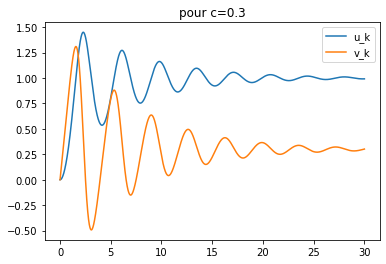

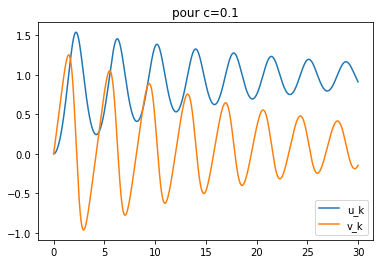

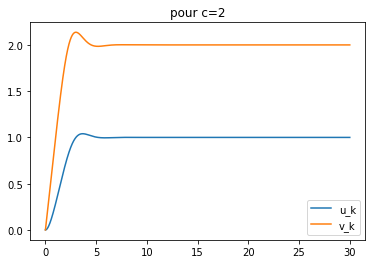

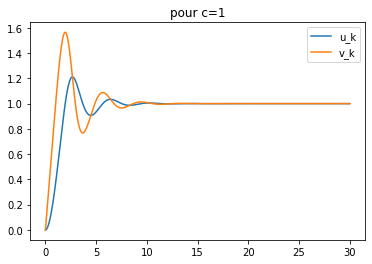

Donc on remarque que pour c <= 1 on a la converge est oscillante (régime sous-amorti),
 et pour c > 1 on a la convergence vers l'équilibre s'effectue de manière monotone (régime sur-amorti).


In [12]:
# On implementé f(u) tout d'abord 
def f(u):
    return 1-u**3

def tracage_C(c):
    
    
        # on definit les constantes :
        T=30
        h=10**(-3)
        
        # on implemente iter(uk,vk,h)
        def iter(uk,vk,h):
            
            # on calcul v(k+1/2)
            a=f(uk)
            inter=vk+(h/2)*a # inter c'est v(k+1/2)
            
            #on calcul u(k+1)
            A=1+(h/2)*c
            uk_plus_1=(1/A)*((1-(h/2)*c)*uk +h*inter)
            
            # on calcul v(k+1)
            b=f(uk_plus_1)
            vk_plus_1=inter+(h/2)*b
            
            # on return u(k+1),v(k+1)
            return [uk_plus_1,vk_plus_1]

        def solnum(u0,v0,T,h):
            kmax=int(T/h)
            matrice=np.zeros((2,kmax+1))
            matrice[0][0]=u0
            matrice[1][0]=v0
            for i in range(1,kmax+1):
                valeur=iter(u0,v0,h)
                matrice[0][i]=valeur[0]
                matrice[1][i]=valeur[1]
                u0,v0=valeur[0],valeur[1]
            return matrice



            
            
        t=[k*h for k in range(0,int(T/h)+1)]
        mat_num =solnum(0,0,T,h)
        
            

        val_u_k = mat_num[0]
        val_v_k = mat_num[1]
        plt.title(f"pour c={c}")
        plt.plot(t,val_u_k,label="u_k")
        plt.plot(t,val_v_k,label="v_k")
            
        plt.legend()
        plt.show()
    






    
# tracge 
tracage_C(0.3)
tracage_C(0.1)
tracage_C(2)
tracage_C(1)

print("Donc on remarque que pour c <= 1 on a la converge est oscillante (régime sous-amorti),") 
print(" et pour c > 1 on a la convergence vers l'équilibre s'effectue de manière monotone (régime sur-amorti).")  

## 4. Chaîne d'oscillateurs non linéaires forcée à une extrémité

On étudie l'équation (1) avec $C=\mu\, K$ où
$\mu >0$ est un paramètre 
et la matrice $K\in M_n (\mathbb{R})$ ($n \geq 2$) s'écrit:
$$
K =\left(
\begin{array}{cccccc}
 2  & -1 & 0 & 0 & \ldots & 0 \\
 -1 & 2  & -1 & 0 & & \vdots \\
0 & -1 & 2  & -1 & \ddots & \vdots \\
\vdots & 0 & -1 & \ddots & \ddots & 0 \\
\vdots & & \ddots & \ddots & 2 & -1 \\
0 & \ldots & \ldots & 0 & -1 & 1 
\end{array} \right).
$$
On fixe par ailleurs
$$
f(u)= -K\, u^3 + e_1 \quad (7)
$$
où $e_1 = (1,0,0,\ldots , 0)^T$ est le premier vecteur de la base canonique de $\mathbb{R}^n$
et on note
$$
u^3=(u_1^3, u_2^3, \ldots , u_n^3)^T.
$$
Ce système décrit une chaîne de $n$ oscillateurs non linéaires cubiques
(du même type que dans la section 3) couplés à leurs proches voisins.
Une extrémité de la chaîne est soumise à une force constante unitaire, l'autre
extrémité étant fixe.

#### Question 14
Montrer que la matrice $K$ est symétrique définie positive.

Réponse : 
K est symétrique car $K^T=K$


Soit donc $x = (x_1, x_2, ..., x_n)^T$ un vecteur non nul de $R^n$

. On a alors :
$$
\begin{align}
x^T K x
&= \sum_{i=1}^n \sum_{j=1}^n K_{ij} x_i x_j\\
&=x_1^2+(x_1 - x_2)^2 + (x_2 - x_3)^2 + ... + (x_{n-1} - x_n)^2  > 0\\
\end{align}
$$
car $x$ est non nul

ceci étant pour tout vecterus non nuls.

Alors K est symétrique définie positive.

#### Question 15
Montrer que l'équation (3) admet une unique solution d'équilibre $(u^\ast , v^\ast) \in \mathbb{R}^n \times \mathbb{R}^n$ qu'on calculera explicitement.

Réponse : 
ona :

On a $f(u^*)=0$ et $v^*=1+Cu^*$
don $$-K(u^*)³+e_1=0$$

$K$ est inversible (car $K$ est symétrique définie positive), d'où $$(u^*)³=K^{-1}e_1$$

posons : $\omega^*=(u^*)³$ tel que $\omega^*=(\omega¹, ..., \omega^n)^T \in \mathbb{R}^n$

On a : $K\omega^*=e_1$
donc : 
$$ 
\left\{\begin{array}{lllr}
2\omega_1 - \omega_2=1 \\
-\omega_1 + 2 \omega_2 - \omega_3=0 \\
- \omega_2 + 2\omega_3 - \omega_4=0 \\
...\\
-\omega_{n-2} + 2 \omega_{n-1} - \omega_{n}=0 \\
-\omega_{n-1}+\omega_{n}=0 \\
\end{array}
\right.
$$

alors

$$ 
\left\{\begin{array}{lllr}
\omega_1=1 \\
\omega_2=\omega_1 \\
...\\
\omega_{n-1} = \omega_{n-2} \\
\omega_{n}=\omega_{n-1} \\
\end{array}
\right.
$$

donc 

$u^* = (1,...,1)^T\\$ 
et
$$v^* = Cu^* =  \mu(1,0 ..., 0)^T=\mu e_1$$





On veut approcher numériquement la solution $(u(t),v(t))$
de (3) pour une condition initiale $(u(0),v(0))$ donnée et $t \in [0,T]$
en utilisant le schéma (4).

#### Question 16
Définir une fonction **fvec** qui à un vecteur $u$ associe le vecteur $f(u)$ défini par (7).
Tester cette fonction sur le vecteur $u^\ast$.

In [13]:
def K(n):
    # on calcul K tout d'abord 
    k=np.zeros((n,n))
    
    k[0][0]=2
    k[0][1],k[1][0]=-1,-1
    
    k[n-1][n-1]=1
    k[n-1][n-2],k[n-2][n-1]=-1,-1
    
    for i in range(1,n-1):
        k[i][i]=2
        k[i][i-1]= -1
        k[i][i+1]= -1
    
        
    return k


# question 16 
# la fonction fvec(u) return f(u)=-Ku³+e1
def fvec(u,n):
    "return f(u)"
    # valeur de k 
    k=K(n)
      
    #on calcule b = K*u^3
    u_3=(u*u)*u
    b=np.dot(k,u_3)
    
    #on definit e1
    e1=np.zeros(n)
    e1[0]=1
    
    # on return f(u)
    
    return (-1)*b+e1

# Test de la fonction fvec u*
u=np.array([1,1,1]) 
print(fvec(u,3))

# Test de la fonction fvec  v*
mi=2
v=np.array([2,0,0]) 
print(fvec(v,3))


[0. 0. 0.]
[-15.   8.   0.]


#### Question 17
Ecrire une fonction **factorise** (prenant en arguments $n$, $\mu$ et $h$) qui calcule
la factorisation $A = L\, U = L\, D\, L^t$ de la matrice tridiagonale symétrique définie positive $A$ définie par (5).
On rappelle que $L$ et $D$ sont de la forme
$$
L =\left(
\begin{array}{cccccc}
 1  & 0 & 0 & 0 & \ldots & 0 \\
 l_0 & 1  & 0 & 0 & & \vdots \\
0 & l_1 & 1  & 0 & \ddots & \vdots \\
\vdots & 0 & l_2 & \ddots & \ddots & 0 \\
\vdots & & \ddots & \ddots & \ddots & 0 \\
0 & \ldots & \ldots & 0 & l_{n-2} & 1 
\end{array} \right), \quad
D =\left(
\begin{array}{cccccc}
 d_0  & 0 & 0 & 0 & \ldots & 0 \\
 0 & d_1  & 0 & 0 & & \vdots \\
0 & 0 & d_2  & 0 & \ddots & \vdots \\
\vdots & 0 & 0 & \ddots & \ddots & 0 \\
\vdots & & \ddots & \ddots & \ddots & 0 \\
0 & \ldots & \ldots & 0 & 0 & d_{n-1} 
\end{array} \right)
$$
avec $d_{i}>0$.
La fonction fournit en sortie deux vecteurs contenant 
les coefficients sous-diagonaux de $L$ et diagonaux de $D$.
Tester cette fonction pour des valeurs de votre choix de $n$, $\mu$ et $h$.

In [14]:
"""
on implement l'Algo de la factorisation de chloskey car 
A est symétrique definie positive
 et apres T=LD*(1/2)
"""
def factorise(n,mi,h):
    
    # on definit A tout d'abord A = I +(h/2)C avec C=miK
    
    I=np.identity(n)
    C=mi*K(n)
    A=I+(h/2)*C
    
    # on calcul tout d'abord T ta A=TT^t c
    T=np.zeros((n,n)) 
    for j in range(0,n):
        T[j][j]=np.sqrt((A[j][j])-(sum([(T[j][k])**2 for k in range(0,j)])))
        for i in range(j+1,n):
            T[i][j]=(1/T[j][j])*(A[i][j]-sum([T[i][k]*T[j][k] for k in range(0,j)]))
                           
    # on calcul D :D[i][i]=(T[i][i])**2
    D=np.zeros(n)
    for i in range(0,n):
        D[i]=(T[i][i])**2
    
    # on calcul L on a L[i][i-1]=T[i][i-1]/((D[i-1][i-1])**(1/2))
    L=np.zeros(n-1)
    for i in range(0,n-1):
        L[i]=T[i+1][i]/((np.sqrt(D[i])))
                           
    # on return les deux vecteures L et D :
    return L,D

# Test de la fonction factorise :
print(factorise(3,1,2))
print(factorise(3,1,0))

(array([-0.33333333, -0.375     ]), array([3.        , 2.66666667, 1.625     ]))
(array([0., 0.]), array([1., 1., 1.]))


#### Question 18

Ecrire une fonction **solchaine**
(prenant en arguments la condition initiale $(u(0),v(0))$, le temps maximal d'intégration $T$ et le pas $h$)
qui calcule la solution numérique $(u^{(k)},v^{(k)})$ aux temps $t_k = k\, h \in [0,T]$.
La fonction fournit en sortie
les valeurs de $u^{(k)}$, $v^{(k)}$ pour $0 \leq k \leq k_{\mathrm{max}}$
sous la forme de deux matrices de taille $n \times (k_{\mathrm{max}}+1)$ 
$$
[u^{(0)},u^{(1)},\ldots , u^{(k_{\mathrm{max}})}], \quad
[v^{(0)},v^{(1)},\ldots , v^{(k_{\mathrm{max}})}].
$$
La factorisation $A=L\, D\, L^t$ est calculée avant de démarrer les itérations (4), puis
à chaque itération on résout l'équation (4)-(b) par simple descente/remontée.
Tester cette fonction sur la condition initiale $[u(0), v(0)]=[u^{\ast}, v^{\ast}]$
pour des valeurs de votre choix de $n$, $\mu$, $T$ et $h$.

In [15]:
# on definit les constantes n ,mi,T et h 
# on definit les constantes 
h=10**(-3)
n=5
mi=0.5
T=25
#  on definit la matrrice A
" A=I+(h/2)C avec C = mi*K "
I=np.identity(n)
C=mi*K(n)
A=I+(h/2)*C



def resoudre(n,mi,h,b):
    "prend en parametres :  n,mi,h et un veteur b "
    "return la solution de Ax=b"

    
    L,D=factorise(n,mi,h)
    # on resoudre Ly=b "descente"
    sol_des=np.zeros(n) # sol_des reprenste y 
    sol_des[0]=b[0]
    for k in range(1,n):
        sol_des[k]=b[k]-L[k-1]*sol_des[k-1]
    
    # on resoudre Ux=y "remontéé"
    "on calcul U=D*trans(L)"
    # on recupere L et apres on calcul transp(L)
    L_u=np.zeros((n,n))
    L_u[0][0]=1
    for i in range(1,n):
        L_u[i][i]=1
        L_u[i][i-1]=L[i-1]
    L_u_t=np.transpose(L_u)
    # on recupere la matrice D_u partir du vteur D:
    D_u=np.diag(D)
    # on calcul U
    U=np.dot(D_u,L_u_t)
    
    # on calclu x la soltuoin de Ux=y
    
    sol=np.zeros(n)
    for k in range(n-1,-1,-1):
        sol[k]=(1/U[k][k])*(sol_des[k]-sum([U[k][j]*sol[j] for j in range(k,n)]))
        
    return sol



def solchaine(u0,v0,T,h):
    "return deux maatrices de taille n*(kmax+1)"
    
    # on definit les constantes 
    kmax=int(T/h)
    tmeps=[k*h for k in range(0,kmax+1)]
    # on inisialise le matrice qui return les valeures de u(k*h)
    matrice_u=np.zeros((kmax+1,n))
    matrice_u[0]=u0
    #on inisialise le matricve qui return les valeures de v(k*h)
    matrice_v=np.zeros((kmax+1,n))
    matrice_v[0]=v0
    
    # on ramplir mnt les deux matrcices 
    for k in range(1,kmax+1):
        #on calcul mnt v(k+1/2)
        inter=matrice_v[k-1]+(h/2)*fvec(matrice_u[k-1],n)
        
        # on resoudre l'equation Ax=b avec x=u(k+1) avec la fonction resoudre 
        b=np.dot((I-(h/2)*C),matrice_u[k-1]) +h*inter
        matrice_u[k]=resoudre(n,mi,h,b)
        
        # on calcul v(k+1)
        matrice_v[k]=inter+(h/2)*fvec(matrice_u[k],n)
        
        
    
    # on return les deux matrices : matrice_u et matrice_v
    return  matrice_u,matrice_v

# Test de la fonction fvec u*
u=np.array([1,1,1,1,1]) 


# Test de la fonction fvec  v*

v=np.array([0.5,0,0,0,0]) 


matrice_u,matrice_v=solchaine(u,v,T,h)

print("-----------------------sol_num de u aux pts tk  -------------------------------------------")
print(matrice_u)
print("------------------------------------------------------------------------------------------\n")
print("-----------------------sol_num de v aux pts tk  -------------------------------------------")
print(matrice_v)

-----------------------sol_num de u aux pts tk  -------------------------------------------
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 ...
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
------------------------------------------------------------------------------------------

-----------------------sol_num de v aux pts tk  -------------------------------------------
[[ 5.00000000e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 5.00000000e-01  0.00000000e+00 -4.44089210e-19 -6.66133815e-19
   6.66133815e-19]
 [ 5.00000000e-01  0.00000000e+00 -1.55431223e-18 -2.66453526e-18
   2.66453526e-18]
 ...
 [ 5.00000000e-01 -1.96937133e-13 -4.31424896e-13 -3.20984073e-13
  -3.35313444e-14]
 [ 5.00000000e-01 -1.96797245e-13 -4.31197078e-13 -3.21051685e-13
  -3.34637318e-14]
 [ 5.00000000e-01 -1.96657357e-13 -4.30969260e-13 -3.21119298e-13
  -3.33961192e-14]]


Dans les questions 19 et 20, on simule le système (1) pour la condition initiale (6) correspondant à la chaîne au repos.
On note $u_{\mathrm{app}}(j,t_k)$ l'approximation numérique de la solution $u_j(t_k)$ de (1)-(6),
et $u^\prime_{\mathrm{app}}(j,t_k)$ celle de $u_j^\prime(t_k)$. On a donc
$$
u^\prime_{\mathrm{app}}(.,t_k) = v^{(k)}-\mu\, K\, u^{(k)}.
$$

#### Question 19
On choisit comme pas d'intégration $h=10^{-3}$.
Pour $n=5$ et $\mu = 0.5$, calculer la solution numérique de (1)-(6) sur un intervalle $[0,T]$ bien choisi et
tracer les graphes de $u_{\mathrm{app}}(j,t)$ et $u^\prime_{\mathrm{app}}(j,t)$ en fonction de $t$
pour $j=1,3,5$ (i.e. pour les oscillateurs situés en début, milieu et fin de chaîne).
Quel est l'ordre de grandeur du temps $t_{\mathrm{eq}}$ nécessaire pour atteindre un état proche de l'équilibre ?
On pourra fixer comme critère
$\| u(t)-u^\ast \|_\infty < 10^{-3}$ pour tout $t \geq t_{\mathrm{eq}}$.
Comparer ce temps à celui observé pour $n=1$ (modèle étudié dans la section 3 avec $C=0.5$).

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


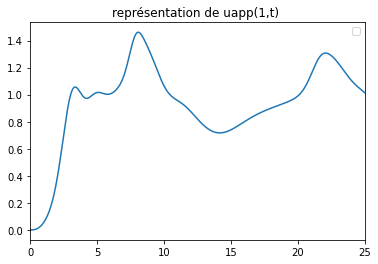

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


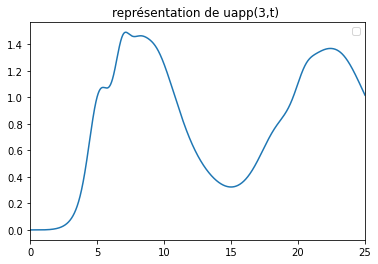

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


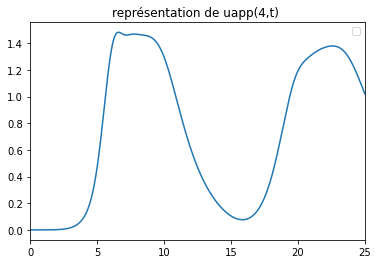

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


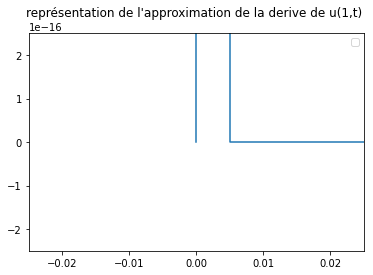

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


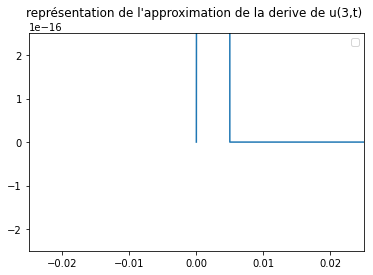

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


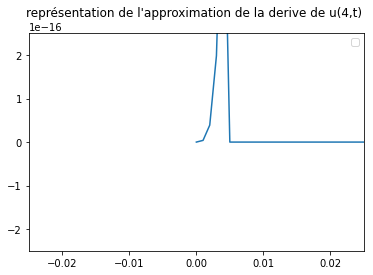

In [21]:
# on definit les constantes 
h=10**(-3)
n=5
mi=0.5
T=25 # par exmple 
# on definit la matrice C 
C=mi*K(n)



# on definit des fonction de tracage de graphe 
def tracage_u(mat,j):
    val_x=np.linspace(0,T,int(T/h)+1)
    val_y=[mat[i][j] for i in range(int(T/h)+1)] # val_y représente : L'ensembles des uapp(j,t)
    plt.plot(val_x,val_y)
    plt.xlim(0,T)
    plt.title(f"représentation de uapp({j},t) ")
    plt.legend()
    plt.show()

def mat_derive_u(mat_u,mat_v):
    "return l'approximation de la derivée de u aux pts tk "
    # on a u'=v-Cu
    size=np.shape(mat_u)
    val_derive_u=np.zeros(size)
    for i in range(n):
        val_derive_u[i]=mat_v[i]-np.dot(C,mat_u[i])
    return val_derive_u
    
def tracage_derive_u(mat_u,mat_v,j):
    
    derive_u=mat_derive_u(mat_u,mat_v)
    val_x=np.linspace(0,T,int(T/h)+1)
    val_y=[derive_u[i][j] for i in range(int(T/h)+1)]
    plt.plot(val_x,val_y)
    plt.xlim(-T/1000,T/1000)
    plt.ylim(-T/100000000000000000,T/100000000000000000)
    plt.title(f"représentation de l'approximation de la derive de u({j},t) ")
    plt.legend()
    plt.show()



u0=np.zeros(n)
v0=np.zeros(n)
matrice_u,matrice_v=solchaine(u0,v0,T,h)
    
# Réprsentation de u
tracage_u(matrice_u,1) # représentation ds oscialltions au début 
tracage_u(matrice_u,3) # représentation ds oscialltions au milieu  
tracage_u(matrice_u,4) # représentation ds oscialltions et au fin 

    
# # Réprsentation de la derivée de u  
tracage_derive_u(matrice_u,matrice_v,1) # représentation ds oscialltions au début 
tracage_derive_u(matrice_u,matrice_v,3) # représentation ds oscialltions au milieu  
tracage_derive_u(matrice_u,matrice_v,4) # représentation ds oscialltions et au fin

#### Question 20

Calculer $u_{\mathrm{app}}$ pour $n=100$ et $\mu = 5$, en fixant
$T=2500$ et $h=10^{-2}$.
Décrire les différents phénomènes qu'on peut observer 
avant que le système atteigne un état voisin de l'équilibre.
Pour étayer votre analyse, afficher un échantillon de graphes bien choisis :

-graphes des 
fonctions $t \mapsto u_{\mathrm{app}}(j,t)$ à différents noeuds $j$,

-graphe de $j \mapsto u_{\mathrm{app}}(j,t)$ à différents temps $t$,

-graphe animé de $j \mapsto u_{\mathrm{app}}(j,t)$ lorsque 
$t$ décrit l'intervalle $[0,T]$, en utilisant 
la fonction **FuncAnimation()** du module animation de Matplotlib.

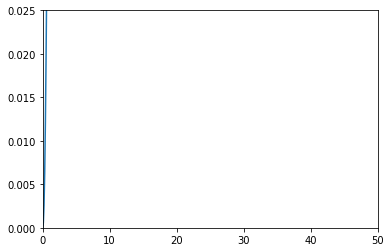

In [23]:
import matplotlib.animation as animation


# on definit les constantes 
T=2500
n=100
mi=5
h=10**(-2)



# u0 et v0 : valeurs initiales 
u0=np.zeros(n)
v0=np.zeros(n)
matrice_u,matrice_v=solchaine(u0,v0,T,h)




#inisialisation de la figure
fig=plt.figure()
line,=plt.plot([],[]) # le "," dans la defintion de line est imporatnt si non python considere line une liste et non un graphe 
plt.xlim(0,T*2)
plt.ylim(0,T/1000) 


# la fonction tracage : pour tracer plusieres graphes pour l'animation
A=matrice_u
j=1
def tracage(h):
    x=np.linspace(0,T,int(T/h)+1)
    y=[A[i][j] for i in range(int(T/h)+1)]
    line.set_data(x,y)
    return line,



anim=animation.FuncAnimation(fig,tracage,frames=[k*h for k in range(1,100000)],interval=100,blit=True,repeat=False)


plt.show()

    

